# Implementing a Simple RNN in Keras

### Notebook Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras import layers

import matplotlib.pyplot as plt 

2024-01-30 07:38:51.169466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 07:38:51.169604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 07:38:51.307644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Constants

In [2]:
MAX_FEATURES = 10000
MAX_LENGTH = 500

### Loading the Data

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

print('shape of input training data:', X_train.shape)
print('shape of input test data:', X_test.shape)

shape of input training data: (25000, 500)
shape of input test data: (25000, 500)


### Training the model with embedding and SimpleRNN layers

In [5]:
network = keras.Sequential([
    layers.Embedding(MAX_FEATURES, 32),
    layers.SimpleRNN(32), 
    layers.Dense(1, activation='sigmoid')
])

network.compile(optimizer='rmsprop', metrics=['accuracy'], loss='binary_crossentropy')

In [6]:
history = network.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


I0000 00:00:1706600353.427675      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 74s 455ms/step - loss: 0.5806 - accuracy: 0.6780 - val_loss: 0.4323 - val_accuracy: 0.8100
Epoch 2/10
157/157 [==============================] - 68s 434ms/step - loss: 0.3699 - accuracy: 0.8444 - val_loss: 0.4599 - val_accuracy: 0.7804
Epoch 3/10
157/157 [==============================] - 66s 423ms/step - loss: 0.2980 - accuracy: 0.8811 - val_loss: 0.4259 - val_accuracy: 0.8012
Epoch 4/10
157/157 [==============================] - 63s 400ms/step - loss: 0.2439 - accuracy: 0.9046 - val_loss: 0.4872 - val_accuracy: 0.7776
Epoch 5/10
157/157 [==============================] - 60s 383ms/step - loss: 0.1995 - accuracy: 0.9244 - val_loss: 0.4165 - val_accuracy: 0.8208
Epoch 6/10
157/157 [==============================] - 60s 382ms/step - loss: 0.1596 - accuracy: 0.9413 - val_loss: 0.4394 - val_accuracy: 0.8504
Epoch 7/10
157/157 [==============================] - 60s 384ms/step - loss: 0.1137 - accuracy: 0.9606 - val_loss: 0.4554 - val_accuracy: 0.8

### Displaying the Results

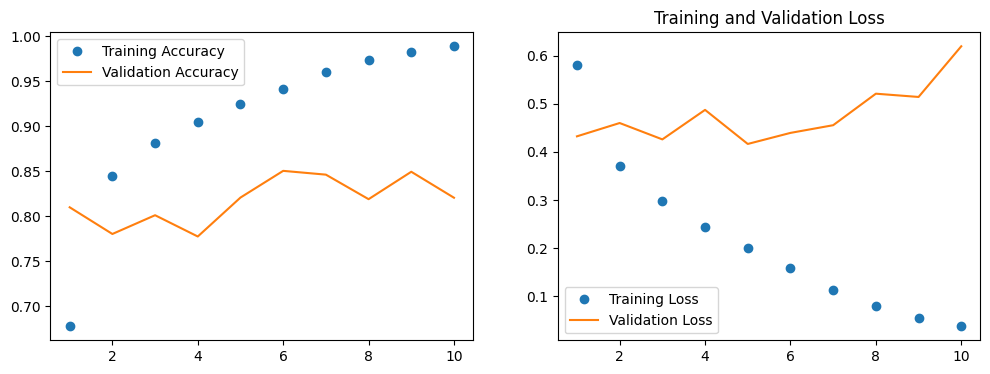

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs = range(1, len(acc) + 1)
ax1.plot(epochs, acc, 'o', label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'o', label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()